# Machine Learning Work Flow, Pipe Line

**주의사항**
* preview)를 보고 할 것.
* 시각화에 날짜 붙이는 것에 너무 집착하지 말자.
    * 판다스를 경유하면 편하다.

# Training Work Flow

**무엇을 무슨 순서로 했는가?**
1. 여기에
2. 채워서
3. 적으면
4. 됩니다.

## 01. Data Loading

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

random.seed(5)  

In [0]:
data_path = 'https://raw.githubusercontent.com/RayleighKim/Example_datasets/master/Bike-Sharing-Dataset/hour.csv'
rides = pd.read_csv(data_path)

In [0]:
# 파생변수 생성 
# 전날 동 시간대 대여량이 다음날의 동 시간대 대여량에 영향을 주는지 확인하기 위해 전날 동 시간대 대여량 추가
rides['d-1_cnt'] = rides['cnt'].shift(24)
rides['d-2_cnt'] = rides['cnt'].shift(48)

In [0]:
rides['d-2_holiday'] = rides['holiday'].shift(48)
rides['d-1_holiday'] = rides['holiday'].shift(24)
rides['d+1_holiday'] = rides['holiday'].shift(-24)
rides['d+2_holiday'] = rides['holiday'].shift(-48)

In [86]:
rides[rides['dteday']=='2011-01-01'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,d-1_cnt,d-2_cnt,d-2_holiday,d-1_holiday,d+1_holiday,d+2_holiday
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,NaN,NaN,NaN,NaN,0.0,0.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,NaN,NaN,NaN,NaN,0.0,0.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,NaN,NaN,NaN,NaN,0.0,0.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,NaN,NaN,NaN,NaN,0.0,0.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,NaN,NaN,NaN,NaN,0.0,0.0


In [0]:
rides = rides[~rides['d-1_cnt'].isna()]
rides = rides[~rides['d-2_cnt'].isna()]
rides = rides[~rides['d-2_holiday'].isna()]
rides = rides[~rides['d-1_holiday'].isna()]
rides = rides[~rides['d+1_holiday'].isna()]
rides = rides[~rides['d+2_holiday'].isna()]

In [88]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,d-1_cnt,d-2_cnt,d-2_holiday,d-1_holiday,d+1_holiday,d+2_holiday
48,49,2011-01-03,1,0,1,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,2,2,17.0,16.0,0.0,0.0,0.0,0.0
49,50,2011-01-03,1,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,1,1,17.0,40.0,0.0,0.0,0.0,0.0
50,51,2011-01-03,1,0,1,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,3,3,9.0,32.0,0.0,0.0,0.0,0.0
51,52,2011-01-03,1,0,1,6,0,1,1,1,0.14,0.1061,0.50,0.3881,0,30,30,6.0,13.0,0.0,0.0,0.0,0.0
52,53,2011-01-03,1,0,1,7,0,1,1,1,0.14,0.1364,0.50,0.1940,1,63,64,3.0,1.0,0.0,0.0,0.0,0.0


In [89]:
rides.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,d-1_cnt,d-2_cnt,d-2_holiday,d-1_holiday,d+1_holiday,d+2_holiday
17326,17327,2012-12-29,1,1,12,19,0,6,0,2,0.30,0.2424,0.61,0.2537,7,90,97,128.0,117.0,0.0,0.0,0.0,0.0
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66,97.0,91.0,0.0,0.0,0.0,0.0
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60,92.0,63.0,0.0,0.0,0.0,0.0
17329,17330,2012-12-29,1,1,12,22,0,6,0,2,0.26,0.2424,0.60,0.4627,3,51,54,62.0,44.0,0.0,0.0,0.0,0.0
17330,17331,2012-12-29,1,1,12,23,0,6,0,2,0.26,0.2424,0.60,0.0000,0,32,32,59.0,26.0,0.0,0.0,0.0,0.0


## 02. Train/Validation/Test Split
**실습**
1. 데이터를 분리 하시오.
    * 마지막 21일은 test_data로 분리
    * 그 다음 60일(-81 ~ -21)은 val_data로 분리
    * 나머지는 train_data로 분리

**주의사항**
* 이걸 제일 먼저 해야 한다.
* Training phase에서는
    1. 모든 탐색, 전처리규칙제작 등은 training set에서.
    2. validation셋에 대하여 고민해보자.


In [0]:
test_data = rides[-21*24:]
val_data = rides[-81*24:-21*24]
train_data = rides[:-81*24]

In [91]:
train_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'd-1_cnt', 'd-2_cnt', 'd-2_holiday',
       'd-1_holiday', 'd+1_holiday', 'd+2_holiday'],
      dtype='object')

In [92]:
len(train_data)

15339

In [93]:
len(val_data)

1440

In [94]:
len(test_data)

504

## 03. EDA for Feature Engineering

* EDA는 명확한 목적하에, 반드시 workflow에 도움이 되는 결과를 도출해야 함.
* EDA를 검색해봐도 좋음.

In [95]:
train_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,d-1_cnt,d-2_cnt,d-2_holiday,d-1_holiday,d+1_holiday,d+2_holiday
48,49,2011-01-03,1,0,1,1,0,1,1,1,0.20,0.1667,0.44,0.4179,0,2,2,17.0,16.0,0.0,0.0,0.0,0.0
49,50,2011-01-03,1,0,1,4,0,1,1,1,0.16,0.1364,0.47,0.3881,0,1,1,17.0,40.0,0.0,0.0,0.0,0.0
50,51,2011-01-03,1,0,1,5,0,1,1,1,0.16,0.1364,0.47,0.2836,0,3,3,9.0,32.0,0.0,0.0,0.0,0.0
51,52,2011-01-03,1,0,1,6,0,1,1,1,0.14,0.1061,0.50,0.3881,0,30,30,6.0,13.0,0.0,0.0,0.0,0.0
52,53,2011-01-03,1,0,1,7,0,1,1,1,0.14,0.1364,0.50,0.1940,1,63,64,3.0,1.0,0.0,0.0,0.0,0.0


무엇이 보이는가?


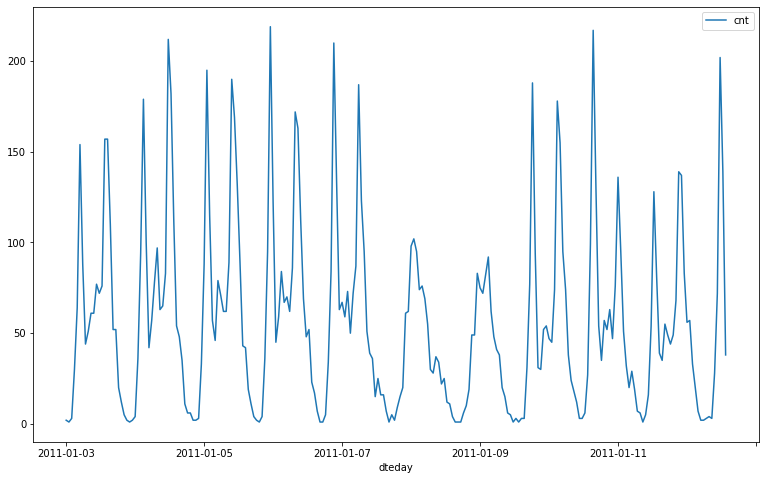

In [96]:
print('무엇이 보이는가?')
train_data[:24*10].plot(x='dteday', y='cnt', figsize=(13,8) )
# train_data[:24*10].plot(x='dteday', y=['registered','cnt'], figsize=(13,8) )

In [97]:
# dt 탐색
train_data.plot(x='dteday', y='cnt', figsize=(100,30))

Output hidden; open in https://colab.research.google.com to view.

season
1    3932
2    4409
3    4496
4    2502
Name: cnt, dtype: int64
season
1    114.178281
2    208.344069
3    236.016237
4    173.182654
Name: cnt, dtype: float64


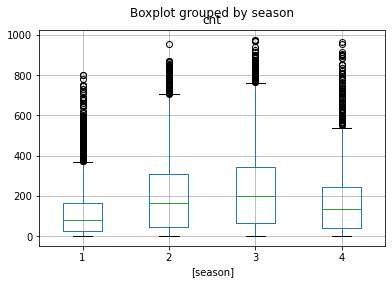

In [98]:
# season 탐색
# season 별 cnt 비교
col_name = 'season'
train_data[col_name].unique()
season_grb = train_data['cnt'].groupby(train_data[col_name])
print(season_grb.size())
print(season_grb.mean())
boxplot = train_data.boxplot(column=['cnt'], by=[col_name])

yr
0    8597
1    6742
Name: cnt, dtype: int64
yr
0    144.388973
1    240.382379
Name: cnt, dtype: float64


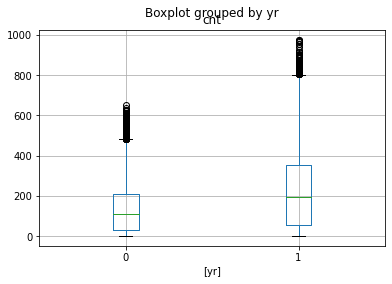

In [99]:
# 연도별 탐색
# 연도별 별 cnt 비교
col_name = 'yr'
train_data[col_name].unique()
season_grb = train_data['cnt'].groupby(train_data[col_name])
print(season_grb.size())
print(season_grb.mean())
boxplot = train_data.boxplot(column=['cnt'], by=[col_name])

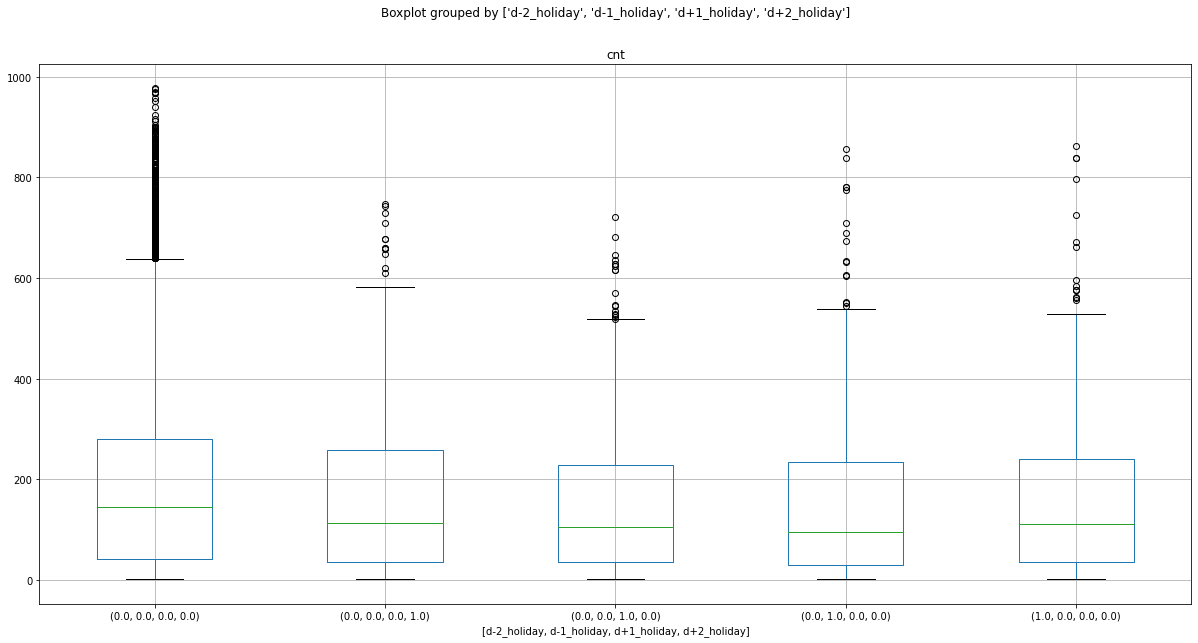

In [100]:
# 휴일별 탐색
col_name = 'd-2_holiday'
boxplot = train_data.boxplot(column=['cnt'], by=['d-2_holiday', 'd-1_holiday', 'd+1_holiday', 'd+2_holiday'], figsize=(20,10))

mnth
1     1381
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10     919
11     719
12     741
Name: cnt, dtype: int64
mnth
1      96.409848
2     112.865026
3     155.410726
4     187.260960
5     222.907258
6     240.515278
7     231.819892
8     238.097627
9     240.773138
10    184.778020
11    142.095967
12    117.844804
Name: cnt, dtype: float64


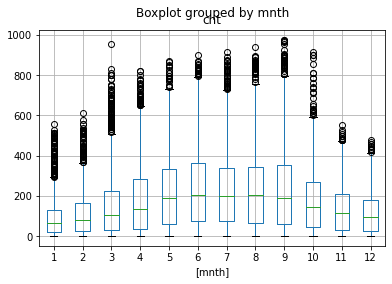

In [101]:
# 월별 탐색
# 월 별 cnt 비교
col_name = 'mnth'
train_data[col_name].unique()
season_grb = train_data['cnt'].groupby(train_data[col_name])
print(season_grb.size())
print(season_grb.mean())
boxplot = train_data.boxplot(column=['cnt'], by=[col_name])

hr
0     640
1     640
2     631
3     616
4     614
5     634
6     641
7     643
8     642
9     642
10    642
11    642
12    643
13    643
14    643
15    643
16    644
17    644
18    642
19    642
20    642
21    642
22    642
23    642
Name: cnt, dtype: int64
hr
0      53.592188
1      32.759375
2      22.722662
3      11.801948
4       6.187296
5      19.184543
6      74.820593
7     207.758942
8     348.264798
9     213.526480
10    170.232087
11    203.591900
12    246.639191
13    247.219285
14    234.317263
15    243.547434
16    304.049689
17    456.454969
18    424.549844
19    312.827103
20    227.554517
21    173.612150
22    132.534268
23     87.704050
Name: cnt, dtype: float64


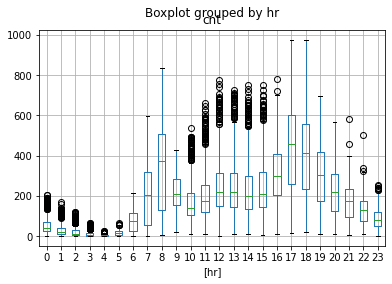

In [102]:
# 월별 탐색
# 월 별 cnt 비교
col_name = 'hr'
train_data[col_name].unique()
season_grb = train_data['cnt'].groupby(train_data[col_name])
print(season_grb.size())
print(season_grb.mean())
boxplot = train_data.boxplot(column=['cnt'], by=[col_name])

weekday
0    2191
1    2198
2    2179
3    2187
4    2185
5    2199
6    2200
Name: cnt, dtype: int64
weekday
0    178.460064
1    180.011374
2    187.503901
3    186.074531
4    192.821053
5    192.445657
6    188.764091
Name: cnt, dtype: float64


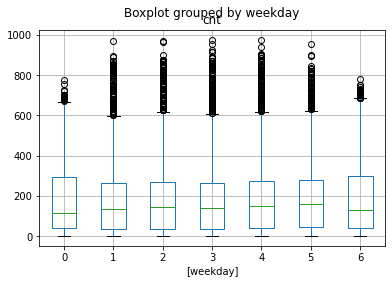

In [103]:
# 월별 탐색
# 월 별 cnt 비교
col_name = 'weekday'
train_data[col_name].unique()
season_grb = train_data['cnt'].groupby(train_data[col_name])
print(season_grb.size())
print(season_grb.mean())
boxplot = train_data.boxplot(column=['cnt'], by=[col_name])

workingday
0     4804
1    10535
Name: cnt, dtype: int64
workingday
0    181.075978
1    189.091694
Name: cnt, dtype: float64


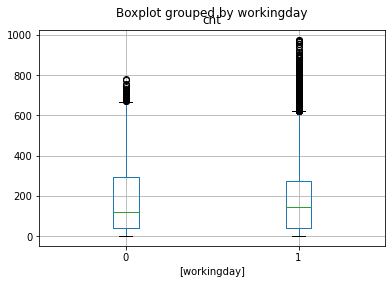

In [104]:
# working day 탐색
# working day 별 cnt 비교
col_name = 'workingday'
train_data[col_name].unique()
season_grb = train_data['cnt'].groupby(train_data[col_name])
print(season_grb.size())
print(season_grb.mean())
boxplot = train_data.boxplot(column=['cnt'], by=[col_name])

weathersit
1    10259
2     3795
3     1282
4        3
Name: cnt, dtype: int64
weathersit
1    202.054976
2    170.047167
3    111.962559
4     74.333333
Name: cnt, dtype: float64


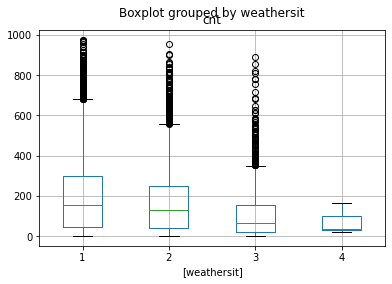

In [105]:
# weathersit 탐색
# weathersit 별 cnt 비교
col_name = 'weathersit'
train_data[col_name].unique()
season_grb = train_data['cnt'].groupby(train_data[col_name])
print(season_grb.size())
print(season_grb.mean())
boxplot = train_data.boxplot(column=['cnt'], by=[col_name])

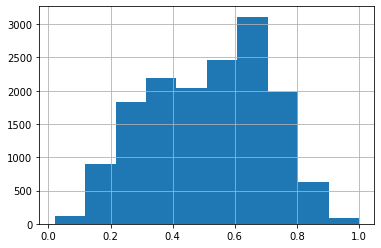

In [106]:
# temp 탐색
col_name = 'temp'
train_data[col_name].hist()

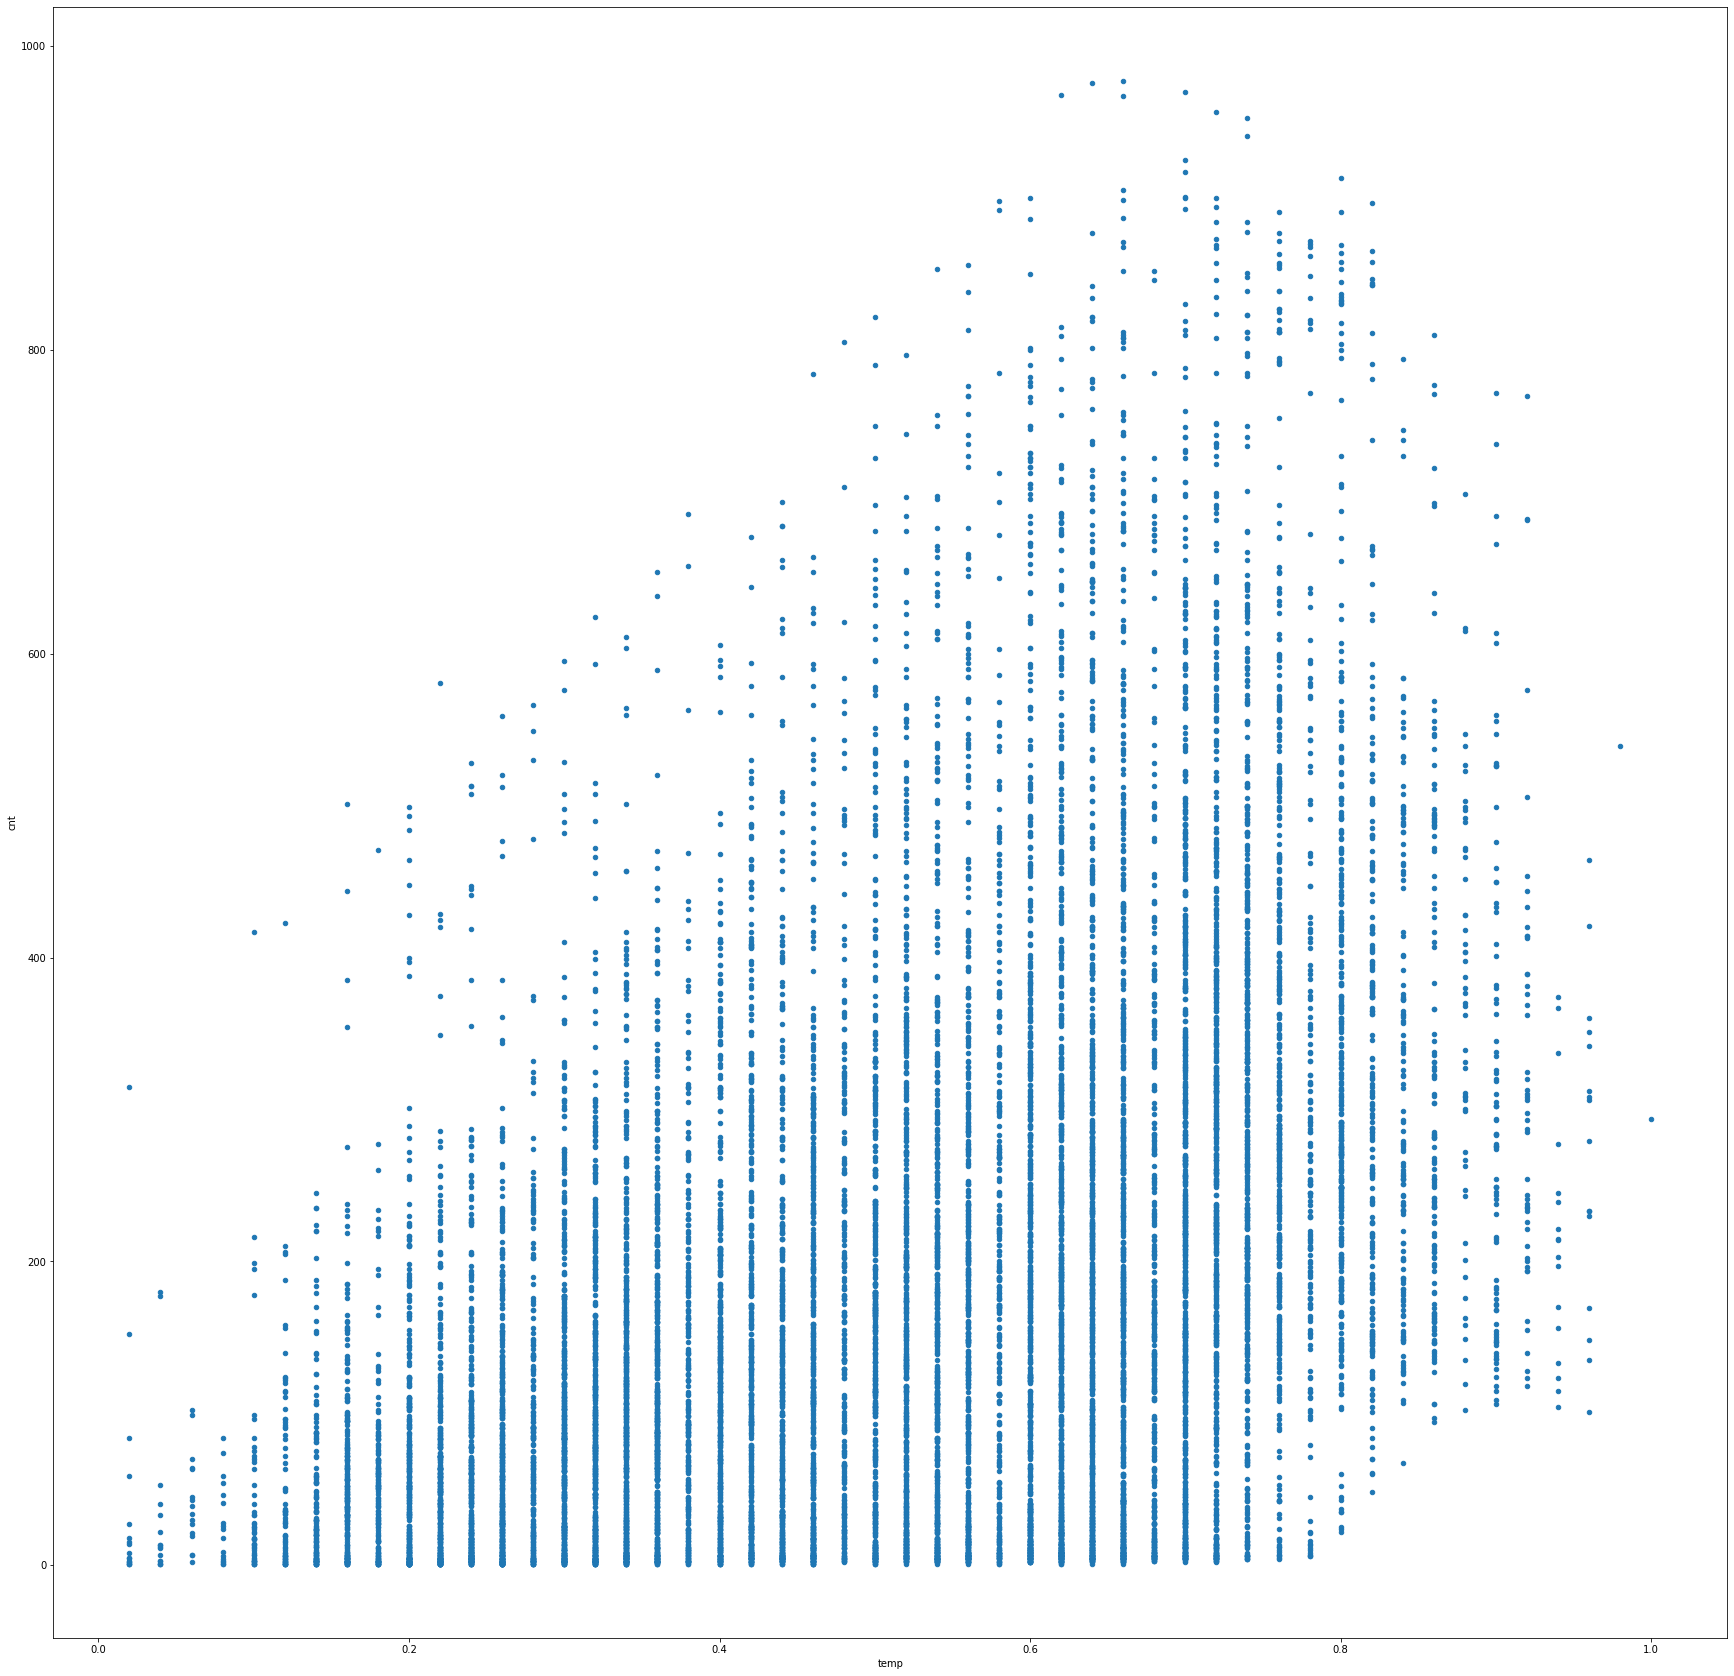

In [107]:
col_name = 'temp'
train_data[col_name].unique()
scatter_plot = train_data.plot.scatter(x=col_name, y='cnt', figsize=(30,30))

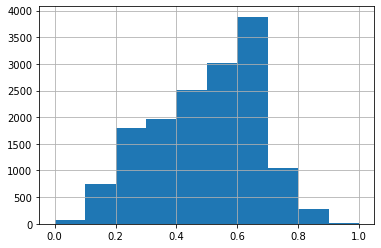

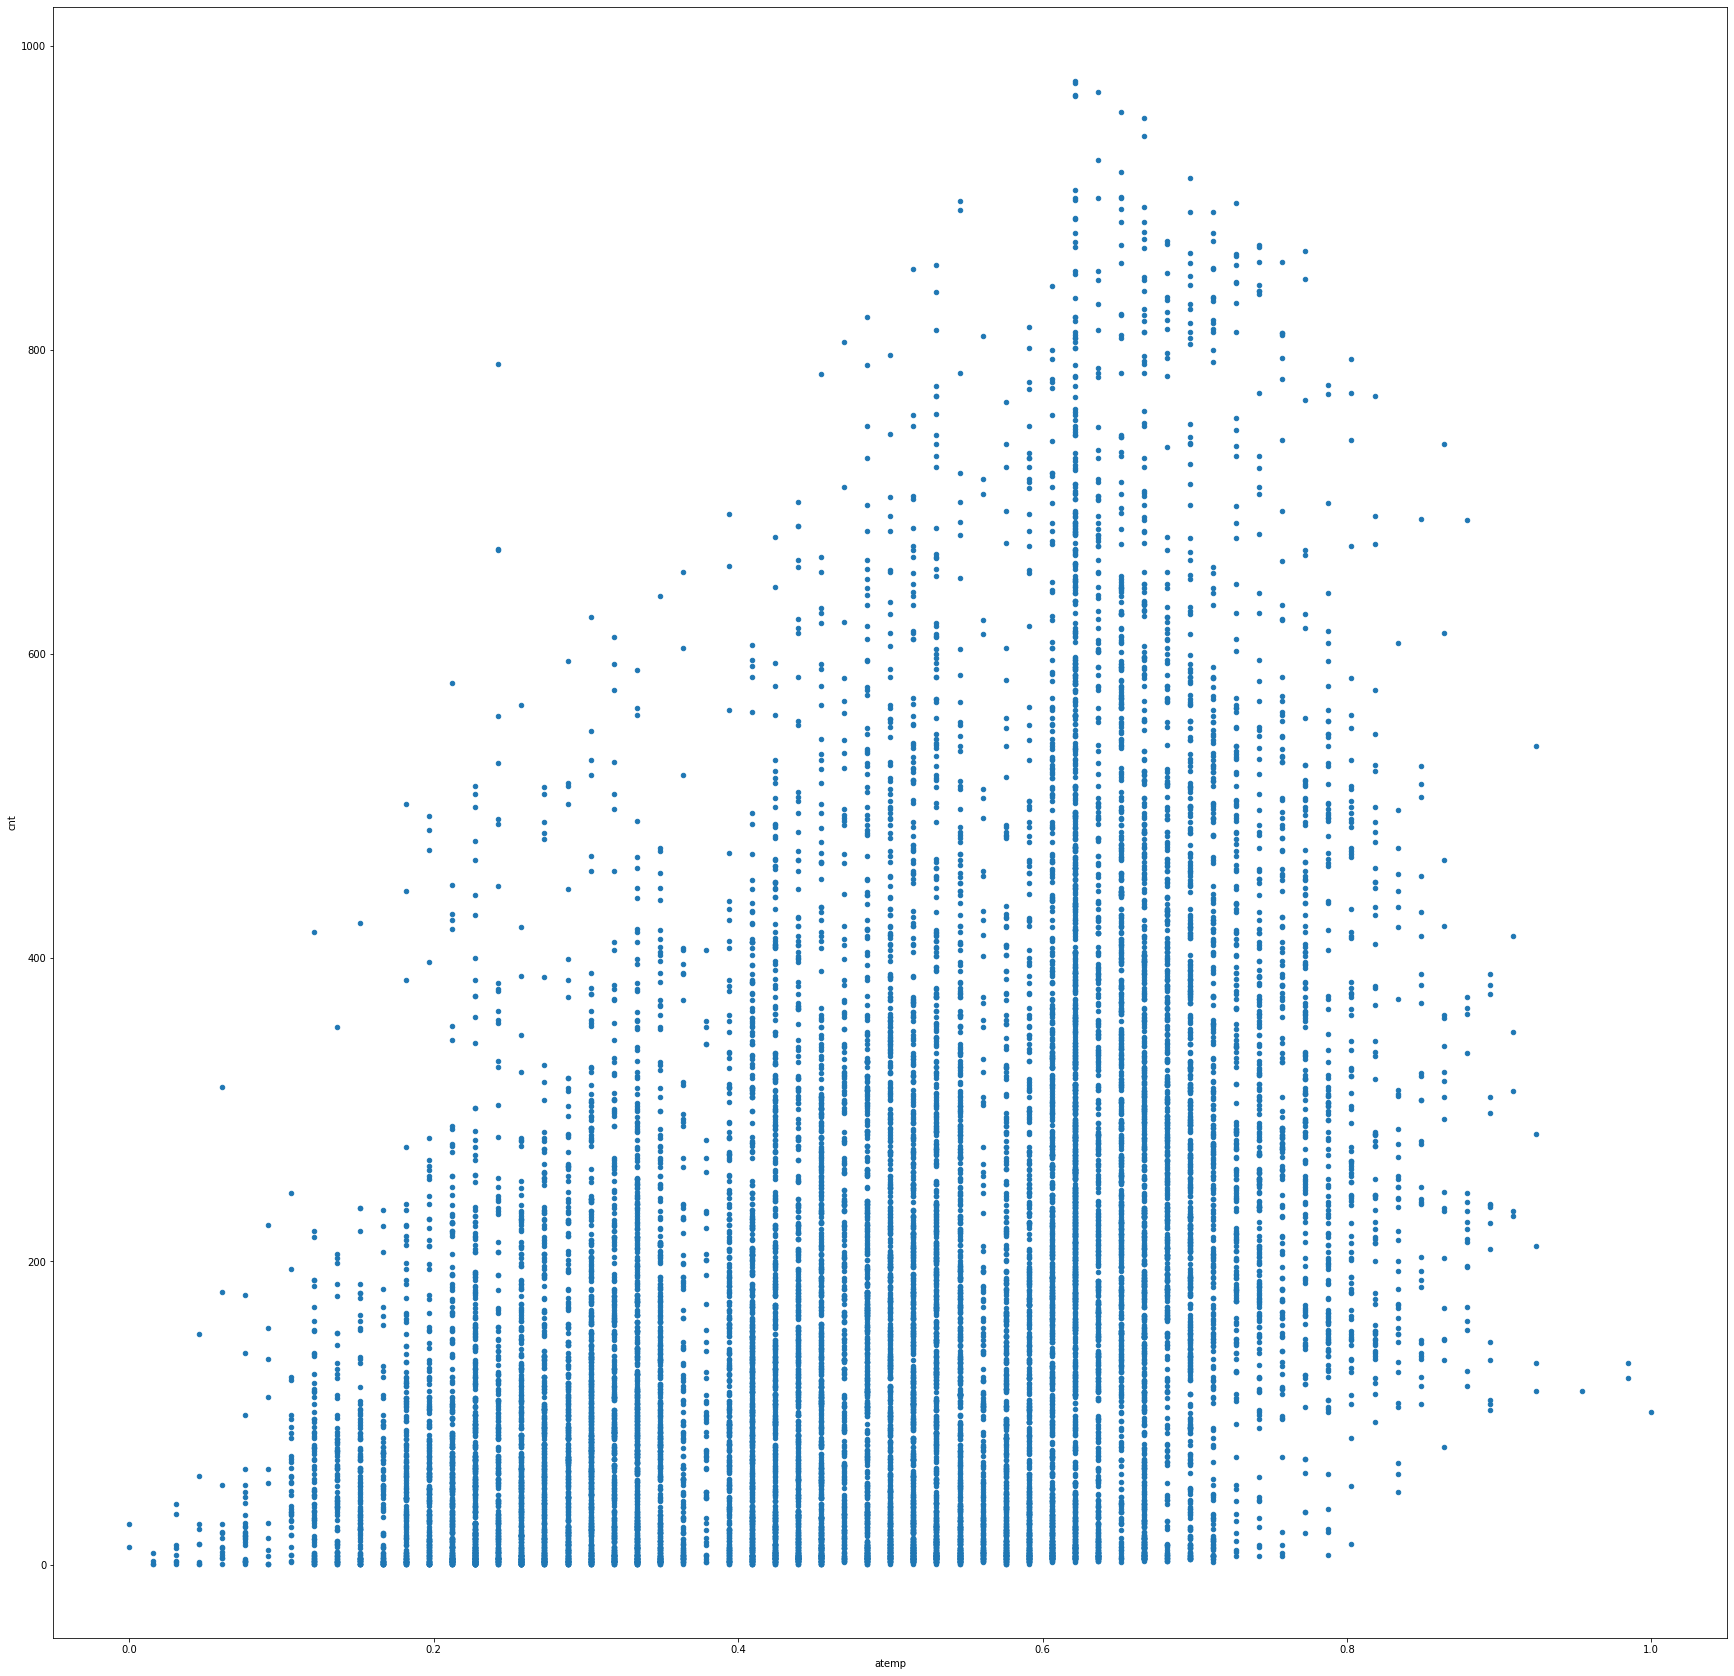

In [108]:
# atemp 탐색
col_name = 'atemp'
train_data[col_name].hist()
train_data[col_name].unique()
scatter_plot = train_data.plot.scatter(x=col_name, y='cnt', figsize=(30,30))

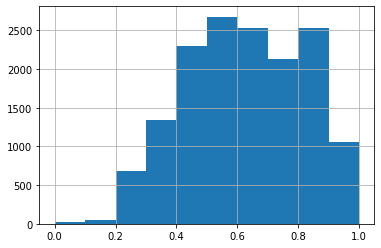

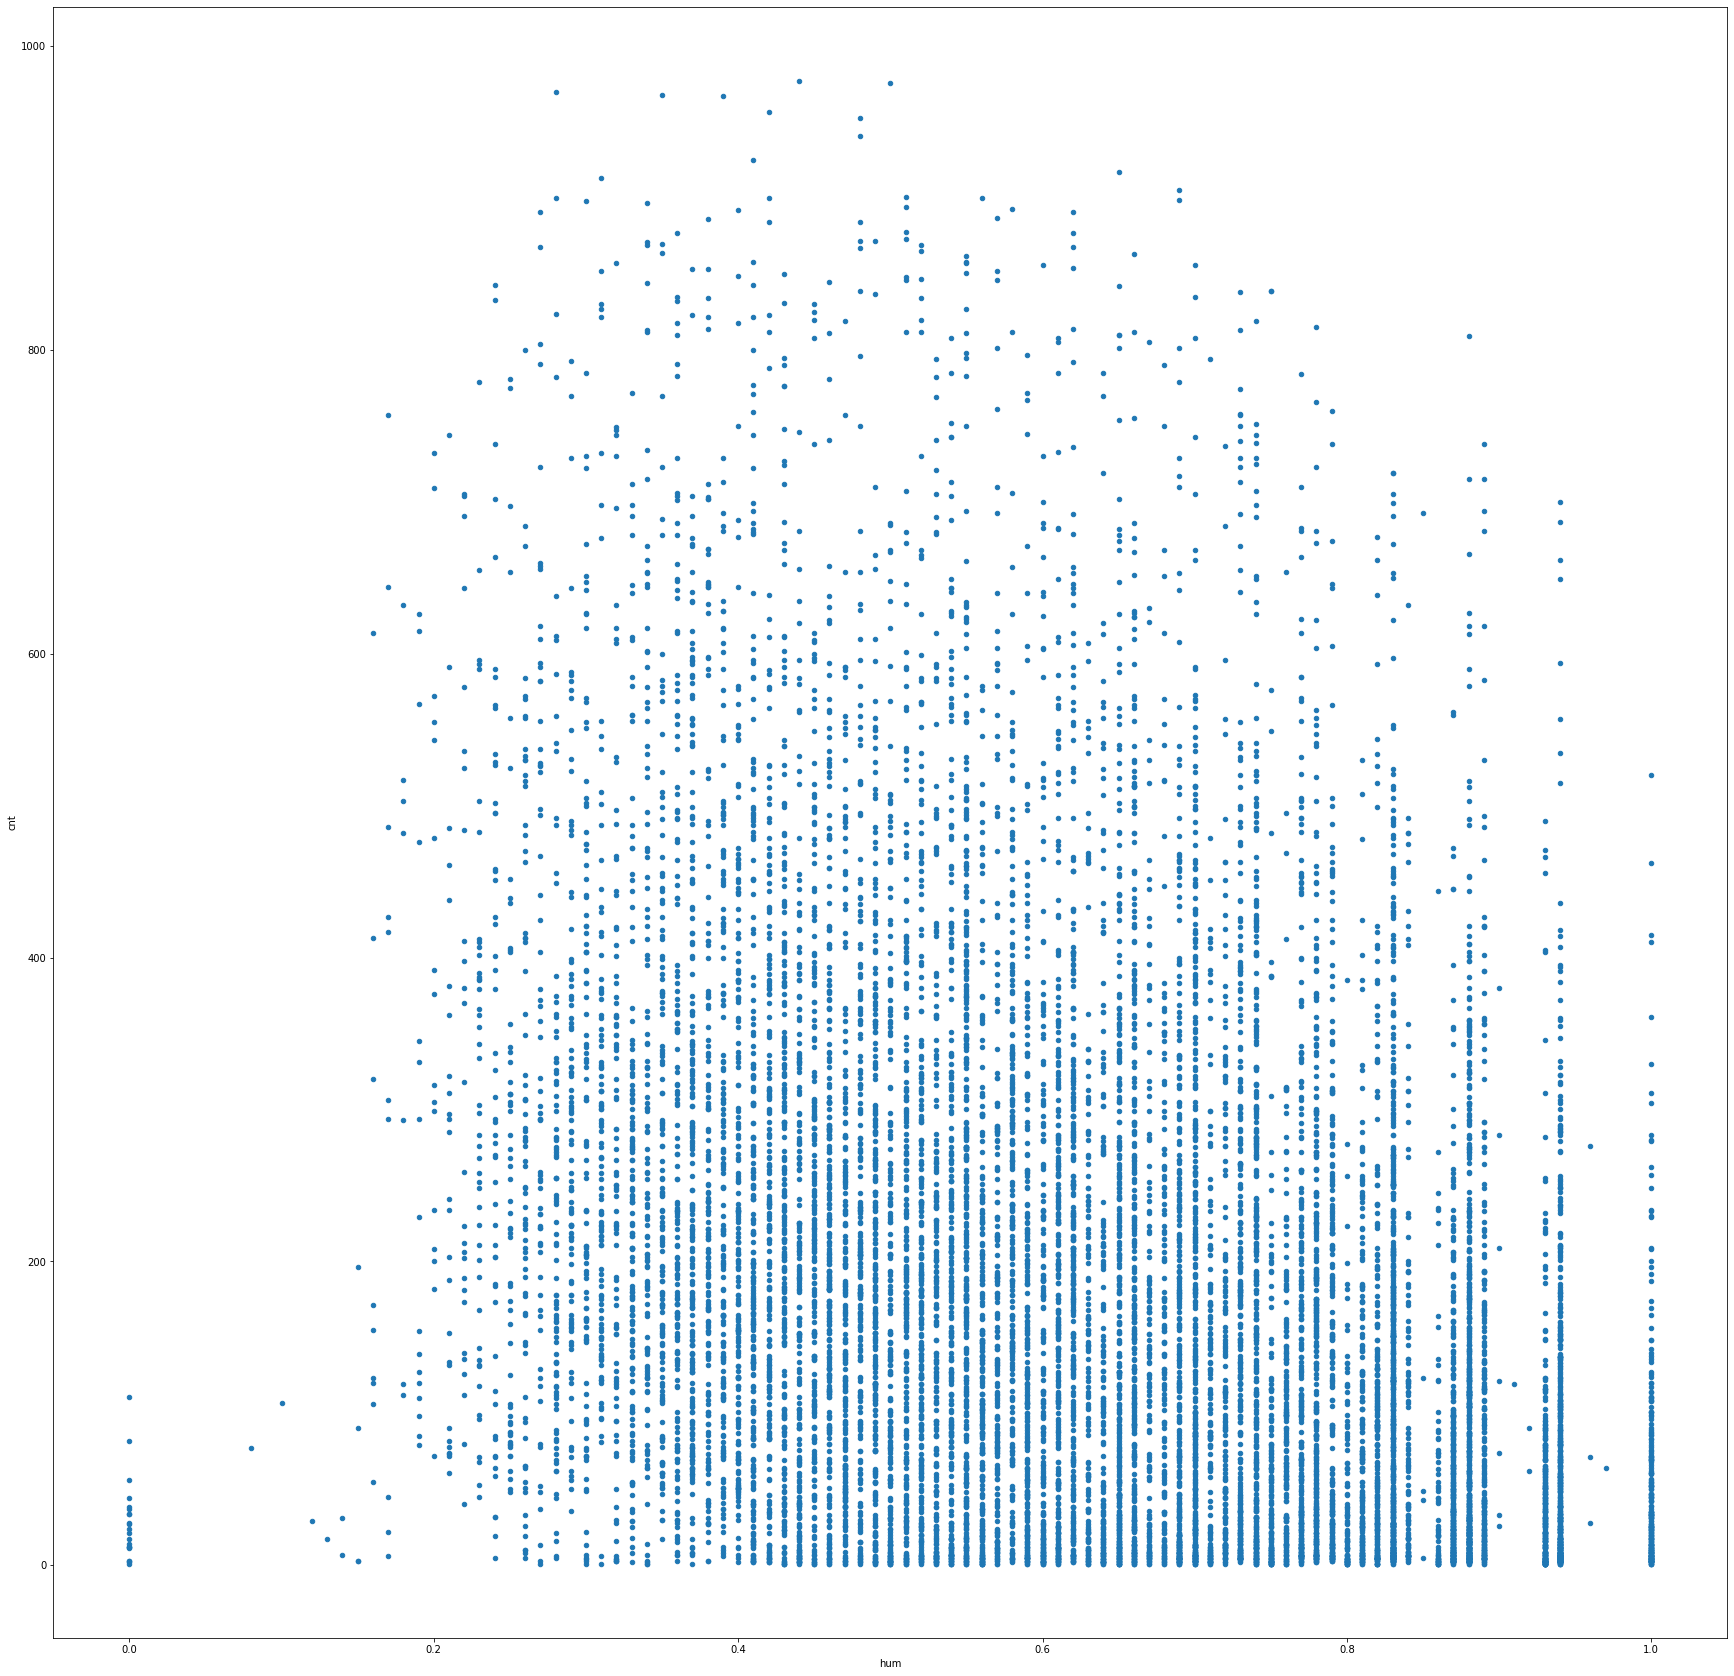

In [109]:
# hum 탐색
col_name = 'hum'
train_data[col_name].hist()
train_data[col_name].unique()
scatter_plot = train_data.plot.scatter(x=col_name, y='cnt', figsize=(30,30))

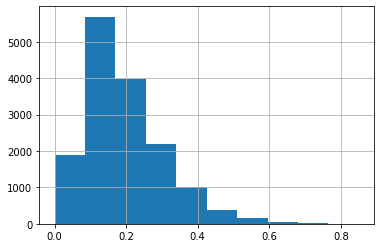

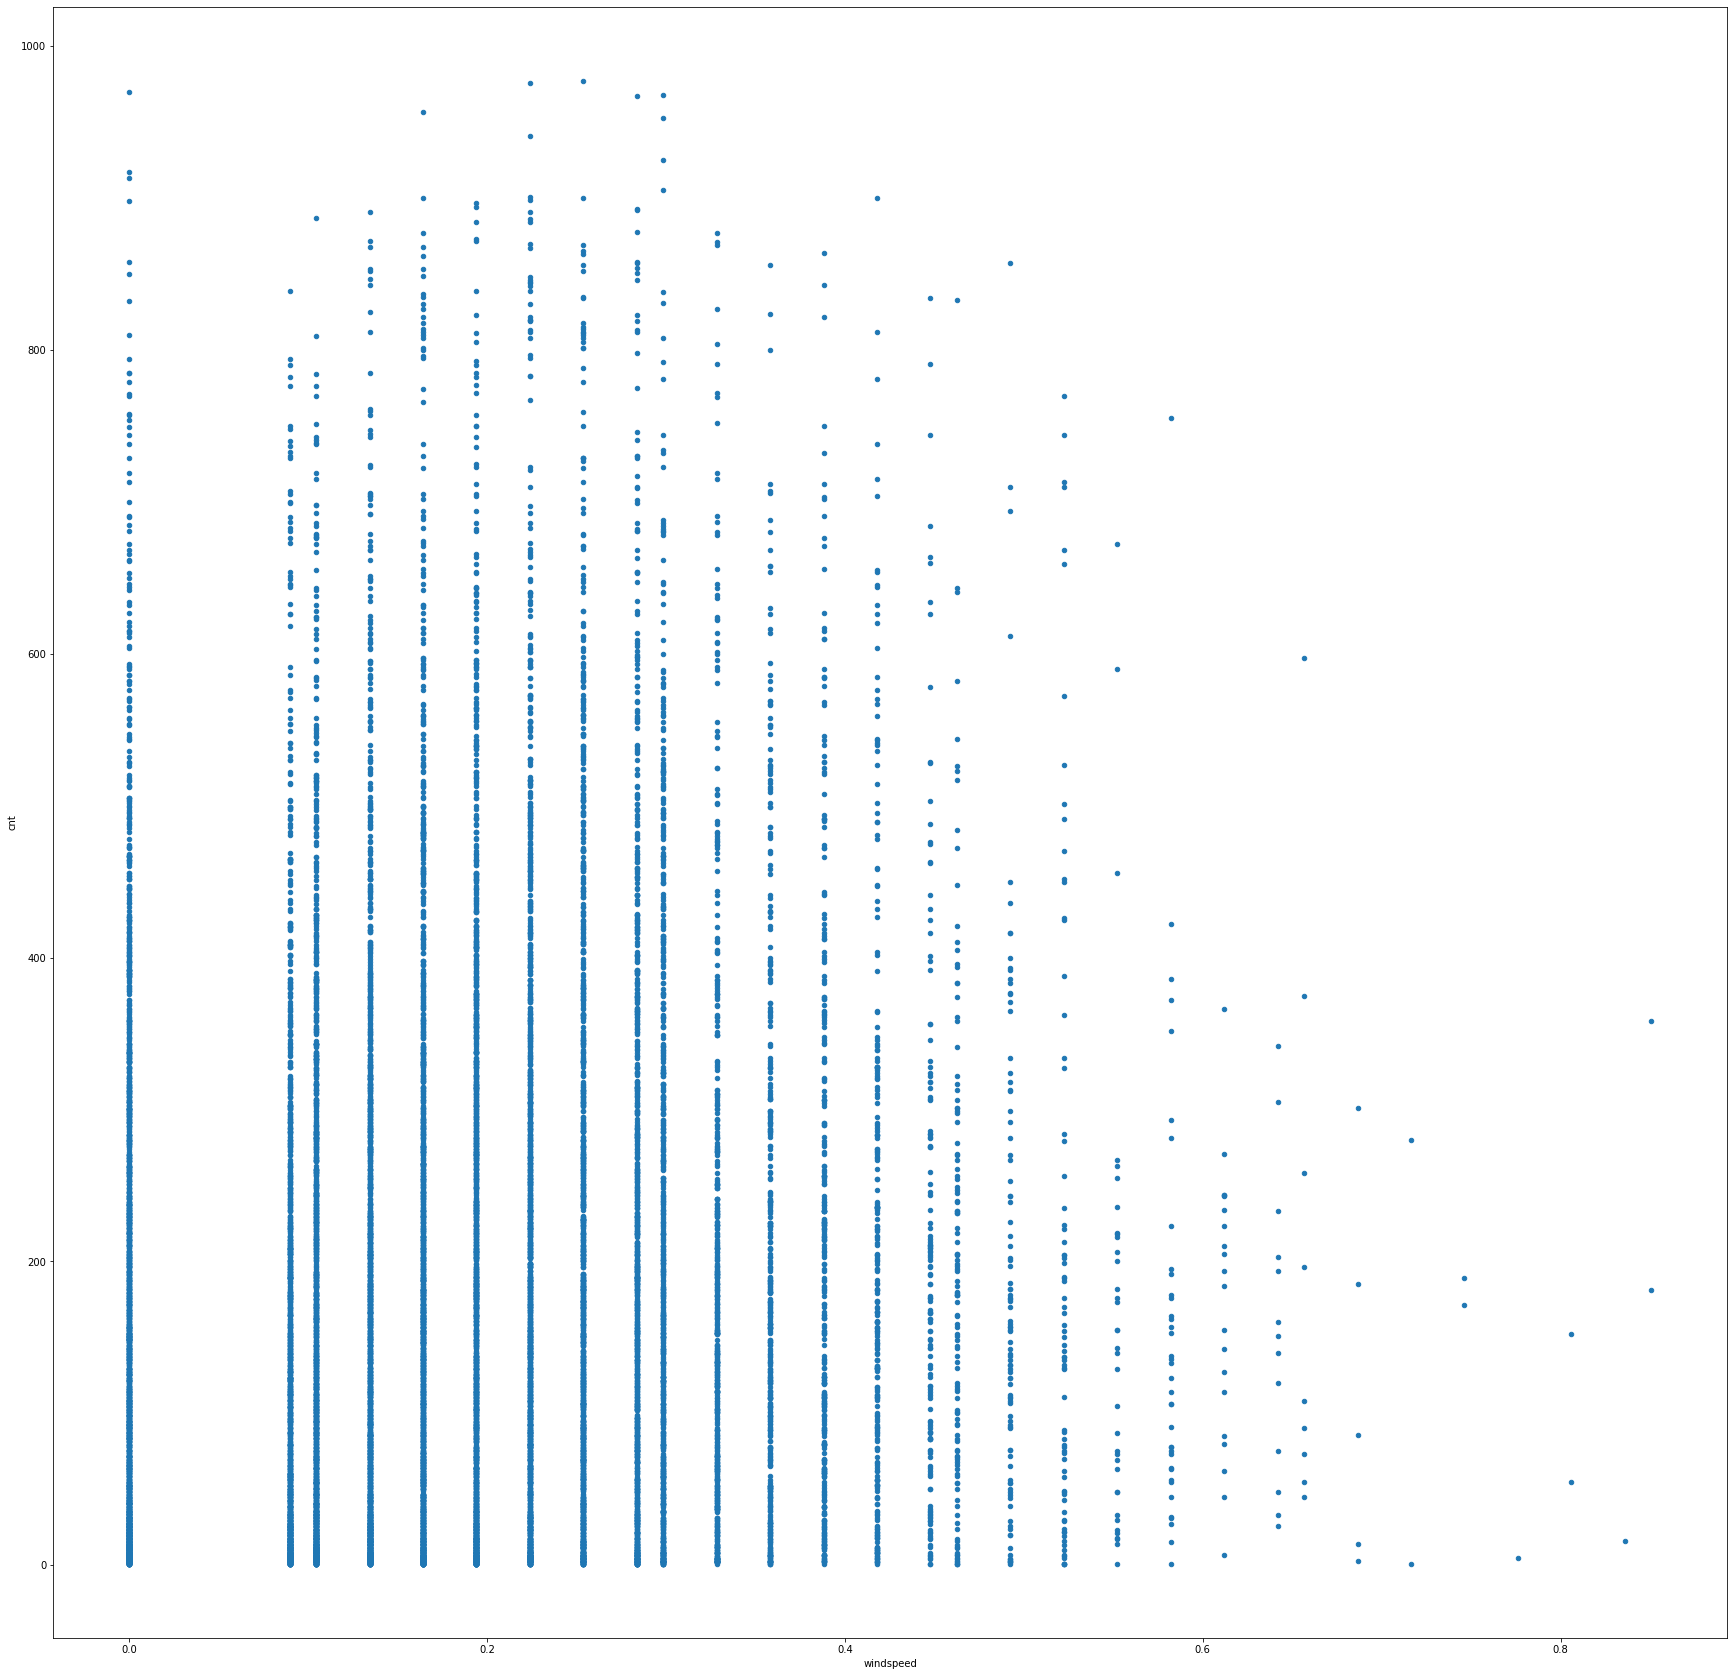

In [110]:
# atemp 탐색
col_name = 'windspeed'
train_data[col_name].unique()
train_data[col_name].hist()
scatter_plot = train_data.plot.scatter(x=col_name, y='cnt', figsize=(30,30))

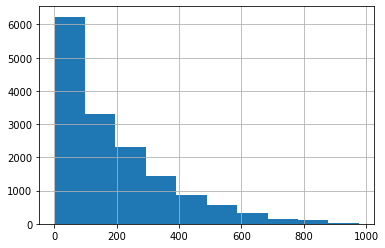

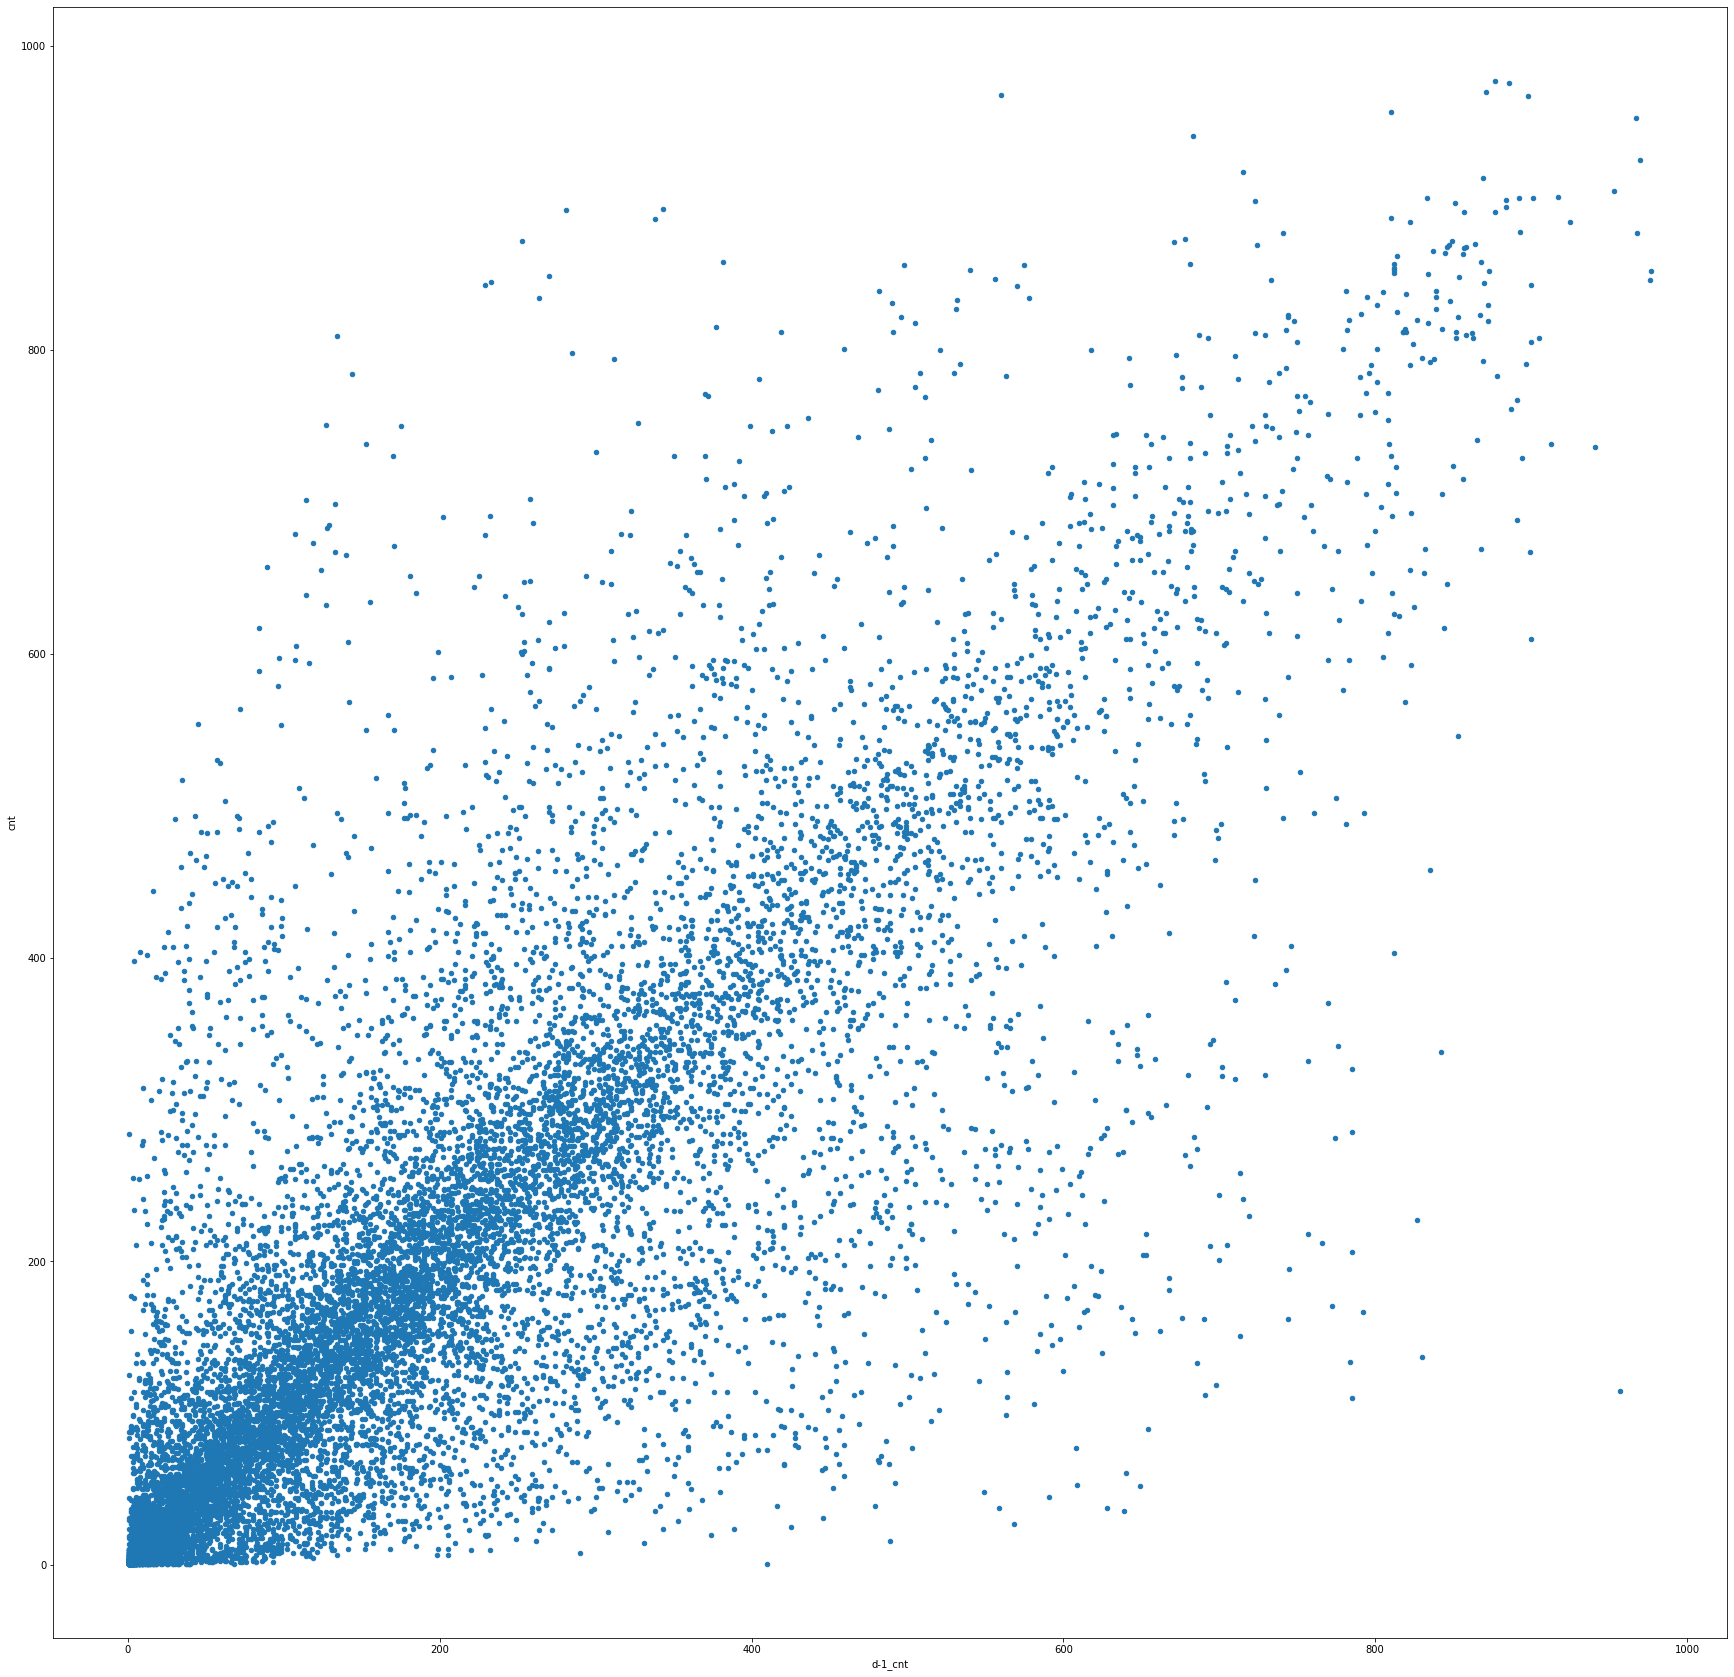

In [111]:
# d-1_cnt 와 today_cnt의 관계
col_name = 'd-1_cnt'
train_data[col_name].unique()
train_data[col_name].hist()
scatter_plot = train_data.plot.scatter(x=col_name, y='cnt', figsize=(30,30))

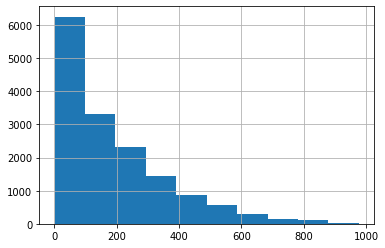

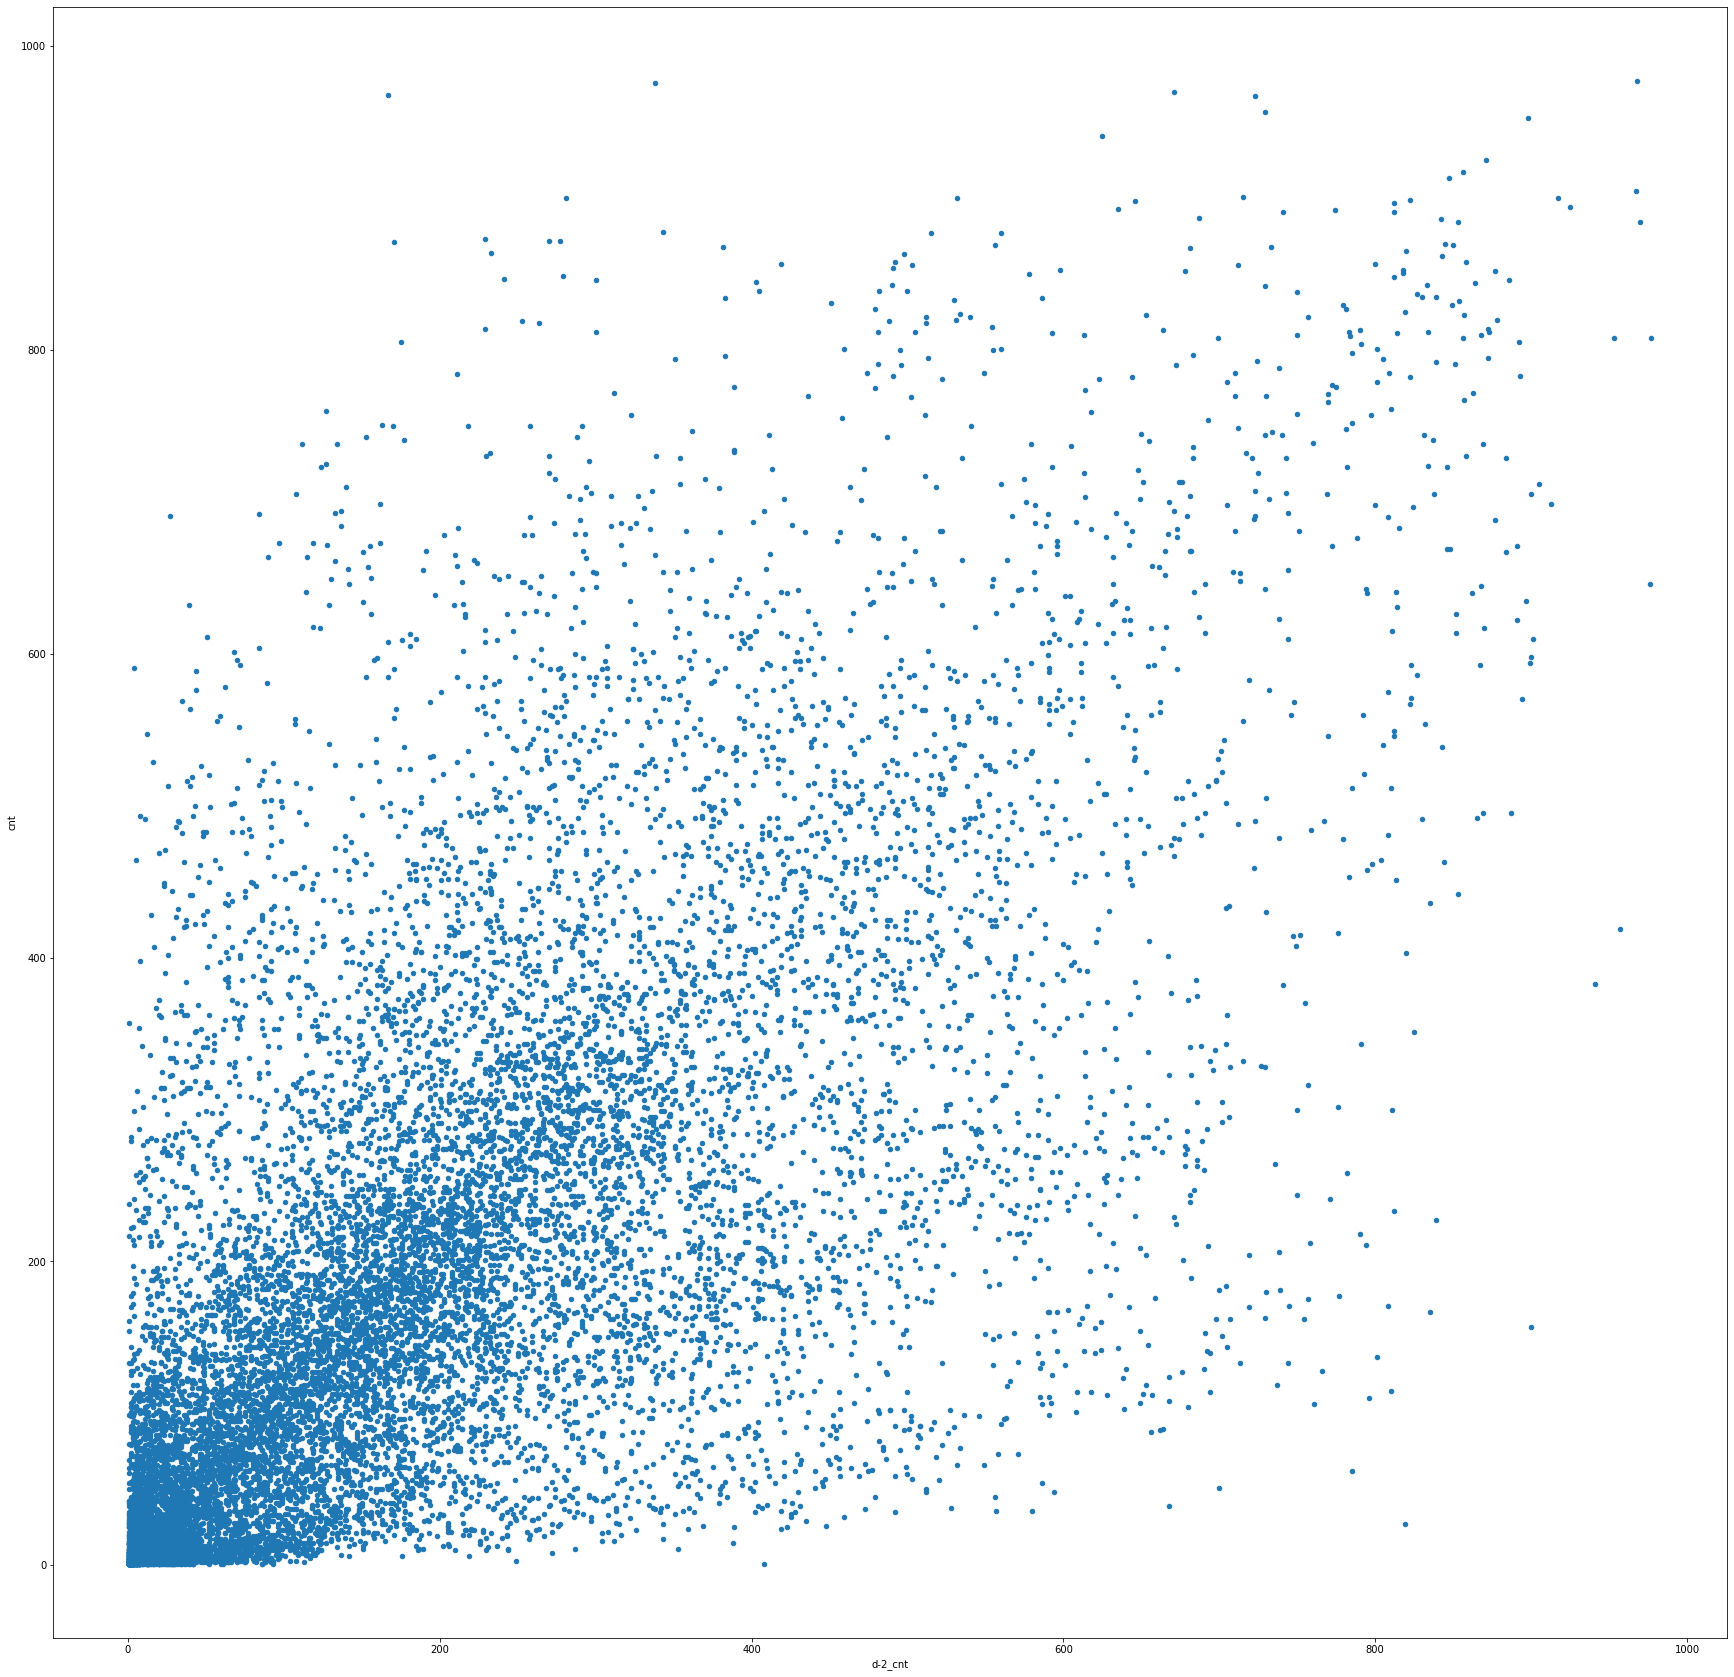

In [112]:
# d-2_cnt 와 today_cnt의 관계
col_name = 'd-2_cnt'
train_data[col_name].unique()
train_data[col_name].hist()
scatter_plot = train_data.plot.scatter(x=col_name, y='cnt', figsize=(30,30))

**EDA의 결론을 적으시오**<br>
Hint : Feature Engineering/Extraction 계획을 하시오.<br>
[궁금할지도 모르는 내용](https://datascience.stackexchange.com/questions/29006/feature-selection-vs-feature-extraction-which-to-use-when)


## 04. Feature Engineering.

**주의사항** : 여기에서 제작 한 것을, test셋에서도 사용하게 될 것이다. 마구잡이로 하면 안됨

1. any ideas : ?
1. dummy : ?
2. scaling : ?
3. drop : ?
4. impute : ?


In [113]:
train_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'd-1_cnt', 'd-2_cnt', 'd-2_holiday',
       'd-1_holiday', 'd+1_holiday', 'd+2_holiday'],
      dtype='object')

In [0]:
# 분석에 사용할 변수 선택 (파생변수 추가 o)
dummy_cols = ['season', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'd-2_holiday', 'd-1_holiday', 'd+1_holiday', 'd+2_holiday'] # 휴일변수 추가 (휴일변수는 0,1만 있어 더미화 불필요하지만 귀찮아서 넣음)
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'd-1_cnt', 'd-2_cnt'] # 전날 대여량 추가
scaling_except_list = [] # 표준화 제외 리스트
target = 'cnt'

In [0]:
# dummy encoding
from sklearn.preprocessing import OneHotEncoder

dummy_encode_model = {}
for dummy_col in dummy_cols:
    enc = OneHotEncoder(drop='first')
    enc.fit(rides[[dummy_col]])
    dummy_encode_model[dummy_col] = enc

In [0]:
dummy_dfs = []

for dummy_col in dummy_cols:
    tmp_df = pd.DataFrame(dummy_encode_model[dummy_col].transform(train_data[[dummy_col]]).toarray())
    tmp_cols = tmp_df.columns
    tmp_df.columns = [dummy_col + "_" + str(col) for col in tmp_cols]
    dummy_dfs.append(tmp_df)

In [0]:
dummy_features_df = pd.concat(dummy_dfs, axis=1)

In [0]:
# numeric feature scaling

def standardization(raw_df, except_list, scaling_values=None):
    cols = raw_df.columns
    if (len(except_list) == 0):
        except_list = None

    if scaling_values is None:
        scaling_values = {}
        for col in cols:
            if except_list is not None and con in except_list:
                continue
            mean, std = raw_df[col].mean(), raw_df[col].std()
            tmp_values = [mean, std]
            scaling_values[col] = tmp_values

            raw_df[col] = (raw_df[col] - mean)/std

        return raw_df, scaling_values

    else:
        for col in cols:
            if except_list is not None and con in except_list:
                continue
            mean = scaling_values[col][0]
            std = scaling_values[col][1]

            raw_df[col] = (raw_df[col] - mean)/std

        return raw_df, None

In [119]:
numeric_df = train_data[numeric_cols]
numeric_features_df, scaling_values = standardization(numeric_df, scaling_except_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [120]:
numeric_features_df.head()

,temp,atemp,hum,windspeed,d-1_cnt,d-2_cnt
48,-1.607468,-1.857261,-0.949487,1.856800,-0.946415,-0.950941
49,-1.812401,-2.031246,-0.796083,1.613186,-0.946415,-0.816663
50,-1.812401,-2.031246,-0.796083,0.758901,-0.991107,-0.861423
51,-1.914868,-2.205232,-0.642680,1.613186,-1.007867,-0.967725
52,-1.914868,-2.031246,-0.642680,0.026423,-1.024627,-1.034864


In [121]:
scaling_values

{'atemp': [0.490146580611506, 0.1741524678647472],
 'd-1_cnt': [186.40882717256667, 179.00063107560894],
 'd-2_cnt': [185.9659690983767, 178.73453877874158],
 'hum': [0.6256842036638638, 0.19556273628519164],
 'temp': [0.5137544820392521, 0.19518551235655182],
 'windspeed': [0.19076784014603201, 0.1223245291508169]}

In [0]:
# concat features
dummy_features_df.reset_index(inplace=True, drop=True)
numeric_features_df.reset_index(inplace=True, drop=True)
features_train_df = pd.concat([dummy_features_df, numeric_features_df], axis=1)
target_train_df = train_data[['cnt']]

In [123]:
numeric_features_df.tail()

,temp,atemp,hum,windspeed,d-1_cnt,d-2_cnt
15334,-0.890202,-0.813348,0.942489,-0.705237,-0.918482,-0.727145
15335,-0.992668,-0.900628,1.249296,-0.461623,-0.979934,-0.978915
15336,-0.890202,-0.987334,0.686817,0.270855,-0.985521,-0.984510
15337,-0.890202,-0.813348,0.686817,-0.705237,-0.912895,-0.872612
15338,-0.890202,-0.900628,0.686817,-0.217191,-0.845856,-0.570488


In [124]:
dummy_features_df.tail()

,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1,weathersit_2,d-2_holiday_0,d-1_holiday_0,d+1_holiday_0,d+2_holiday_0
15334,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15335,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
features_train_df.head()

,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1,weathersit_2,d-2_holiday_0,d-1_holiday_0,d+1_holiday_0,d+2_holiday_0,temp,atemp,hum,windspeed,d-1_cnt,d-2_cnt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.607468,-1.857261,-0.949487,1.856800,-0.946415,-0.950941
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.812401,-2.031246,-0.796083,1.613186,-0.946415,-0.816663
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.812401,-2.031246,-0.796083,0.758901,-0.991107,-0.861423
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.914868,-2.205232,-0.642680,1.613186,-1.007867,-0.967725
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.914868,-2.031246,-0.642680,0.026423,-1.024627,-1.034864


In [126]:
features_train_df.tail()

,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1,weathersit_2,d-2_holiday_0,d-1_holiday_0,d+1_holiday_0,d+2_holiday_0,temp,atemp,hum,windspeed,d-1_cnt,d-2_cnt
15334,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.890202,-0.813348,0.942489,-0.705237,-0.918482,-0.727145
15335,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.992668,-0.900628,1.249296,-0.461623,-0.979934,-0.978915
15336,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.890202,-0.987334,0.686817,0.270855,-0.985521,-0.984510
15337,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.890202,-0.813348,0.686817,-0.705237,-0.912895,-0.872612
15338,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.890202,-0.900628,0.686817,-0.217191,-0.845856,-0.570488


In [127]:
target_train_df.head()

,cnt
48,2
49,1
50,3
51,30
52,64


In [128]:
# val set / test set 전처리
# val set
dummy_dfs = []

for dummy_col in dummy_cols:
    tmp_df = pd.DataFrame(dummy_encode_model[dummy_col].transform(val_data[[dummy_col]]).toarray())
    tmp_cols = tmp_df.columns
    tmp_df.columns = [dummy_col + "_" + str(col) for col in tmp_cols]
    dummy_dfs.append(tmp_df)

dummy_features_df = pd.concat(dummy_dfs, axis=1)

numeric_df = val_data[numeric_cols]
numeric_features_df, tmp = standardization(numeric_df, scaling_except_list, scaling_values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [129]:
dummy_features_df.head()

,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1,weathersit_2,d-2_holiday_0,d-1_holiday_0,d+1_holiday_0,d+2_holiday_0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
numeric_features_df.reset_index(inplace=True, drop=True)
features_val_df = pd.concat([dummy_features_df, numeric_features_df], axis=1)
target_val_df = val_data[['cnt']]
target_val_df.reset_index(inplace=True, drop=True)

In [131]:
features_val_df.head()

,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1,weathersit_2,d-2_holiday_0,d-1_holiday_0,d+1_holiday_0,d+2_holiday_0,temp,atemp,hum,windspeed,d-1_cnt,d-2_cnt
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.787735,-0.813348,0.431144,0.270855,-0.695019,0.112088
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685268,-0.552657,0.175472,-0.217191,-0.560941,1.169522
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685268,-0.552657,0.277741,-0.461623,-0.007871,1.975186
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.582802,-0.465377,-0.029066,-0.827045,0.835702,2.579434
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.480335,-0.378672,0.022069,-0.217191,1.148550,3.116544


In [132]:
target_val_df.head()

,cnt
0,397
1,332
2,298
3,308
4,341


In [133]:
# test set
dummy_dfs = []

for dummy_col in dummy_cols:
    tmp_df = pd.DataFrame(dummy_encode_model[dummy_col].transform(test_data[[dummy_col]]).toarray())
    tmp_cols = tmp_df.columns
    tmp_df.columns = [dummy_col + "_" + str(col) for col in tmp_cols]
    dummy_dfs.append(tmp_df)

dummy_features_df = pd.concat(dummy_dfs, axis=1)

numeric_df = test_data[numeric_cols]
numeric_features_df, tmp = standardization(numeric_df, scaling_except_list, scaling_values)

numeric_features_df.reset_index(inplace=True, drop=True)
features_test_df = pd.concat([dummy_features_df, numeric_features_df], axis=1)
target_test_df = test_data[['cnt']]
target_test_df.reset_index(inplace=True, drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [134]:
features_test_df.head()

,season_0,season_1,season_2,mnth_0,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,holiday_0,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,workingday_0,weathersit_0,weathersit_1,weathersit_2,d-2_holiday_0,d-1_holiday_0,d+1_holiday_0,d+2_holiday_0,temp,atemp,hum,windspeed,d-1_cnt,d-2_cnt
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.685268,-0.552657,1.607238,-0.705237,-0.119602,-0.296339
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.582802,-0.465377,1.607238,-1.559522,-0.359825,-0.520134
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.582802,-0.465377,1.249296,-0.461623,-0.465969,-0.771904
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.582802,-0.465377,1.249296,-0.705237,-0.482729,-0.883802
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.582802,-0.465377,1.249296,-0.705237,-0.650326,-0.978915


In [135]:
target_test_df.head()

,cnt
0,160
1,162
2,118
3,102
4,78


## 05. Modeling & Hyperparameter tuning

* Validation set을 적극 활용해보자.
* 여러 모델 다 사용해봐도 좋음.


In [0]:
# 모델 저장
models = []

In [0]:
'''
단순한 multivariate regression을 해보자!
'''
import time # 학습시간 측정용
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
# 파생변수를 추가 유무에 따른 feature cols 정의

In [0]:
# 파생변수 추가 x
origin_features = features_train_df.columns.tolist()
origin_features.remove('d-2_holiday_0')
origin_features.remove('d-1_holiday_0')
origin_features.remove('d+1_holiday_0')
origin_features.remove('d+2_holiday_0')
origin_features.remove('d-1_cnt')
origin_features.remove('d-2_cnt')

# 앞뒤 휴일 및 전 대여량을 1일만 볼 경우
added_features_type1 = features_train_df.columns.tolist()
added_features_type1.remove('d-2_holiday_0')
added_features_type1.remove('d+2_holiday_0')
added_features_type1.remove('d-2_cnt')

# 앞뒤 휴일 및 전 대여량을 2일만 볼 경우
added_features_type2 = features_train_df.columns.tolist()

In [140]:
## 파생변추가 x 모델
## 리니어 모델 사용
features_name = origin_features

# 모델 준비
simple_regression = linear_model.LinearRegression()

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
simple_regression.fit(features_train_df[features_name].values, target_train_df.values)
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

models.append(simple_regression)

----  0.06822sec, training complete  ----


In [0]:
### Training & Validation set에서의 예측값 준비
train_pred, val_pred = simple_regression.predict(features_train_df[features_name]), simple_regression.predict(features_val_df[features_name])

In [142]:
# Training & Validation set에서의 성능 확인

print("RMean Squared Error on Training set : {0:.5f}".format(mean_squared_error(target_train_df, train_pred)**(1/2)))
print("RMean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(target_val_df, val_pred)**(1/2)))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(target_train_df, train_pred)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(target_val_df, val_pred)))

RMean Squared Error on Training set : 107.48976
RMean Squared Error on Validation set : 148.20862
R-squared Score on Training set : 0.63923
R-squared Score on Validation set : 0.48917


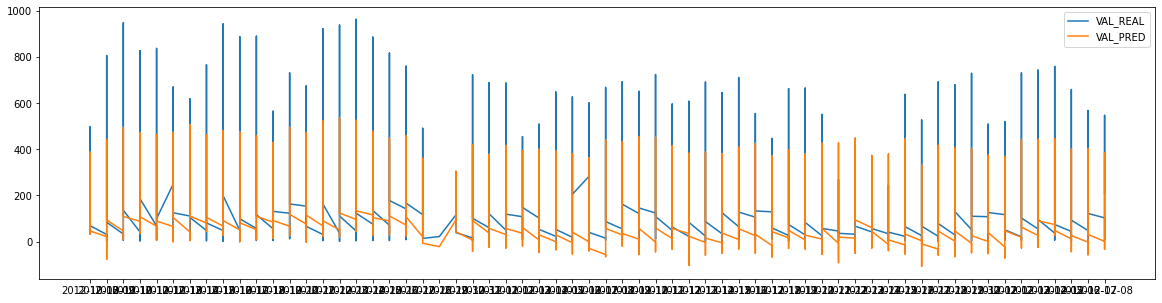

In [143]:
# 시각화
f1 = plt.figure(figsize=(20, 5))
plt.plot(val_data['dteday'], target_val_df['cnt'], label="VAL_REAL")
plt.plot(val_data['dteday'], val_pred, label="VAL_PRED")
plt.legend()
# plt.plot(val_data['dteday'], target_val_df['cnt'], val_data['dteday'], val_pred)

In [144]:
## 파생변추가 1일만 본 경우
## 리니어 모델 사용
features_name = added_features_type1

# 모델 준비
simple_regression = linear_model.LinearRegression()

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
simple_regression.fit(features_train_df[features_name].values, target_train_df.values)
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

models.append(simple_regression)

----  0.06213sec, training complete  ----


In [0]:
# Training & Validation set에서의 예측값 준비
train_pred, val_pred = simple_regression.predict(features_train_df[features_name]), simple_regression.predict(features_val_df[features_name])

In [146]:
# Training & Validation set에서의 성능 확인

print("RMean Squared Error on Training set : {0:.5f}".format(mean_squared_error(target_train_df, train_pred)**(1/2)))
print("RMean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(target_val_df, val_pred)**(1/2)))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(target_train_df, train_pred)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(target_val_df, val_pred)))

RMean Squared Error on Training set : 89.47165
RMean Squared Error on Validation set : 116.87898
R-squared Score on Training set : 0.75004
R-squared Score on Validation set : 0.68231


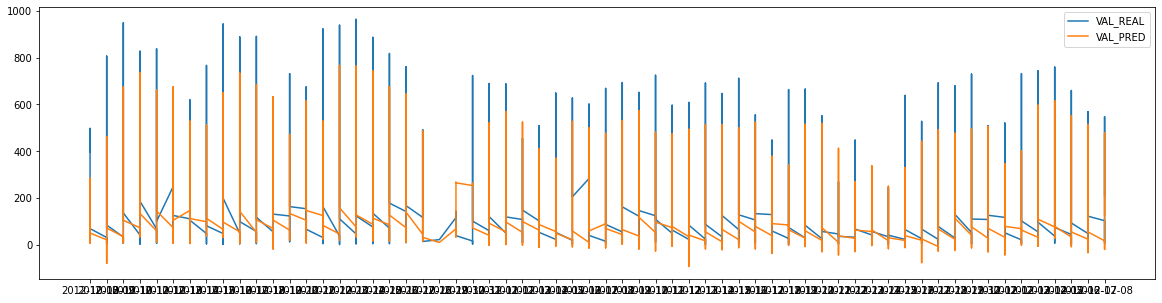

In [147]:
# 시각화
f1 = plt.figure(figsize=(20, 5))
plt.plot(val_data['dteday'], target_val_df['cnt'], label="VAL_REAL")
plt.plot(val_data['dteday'], val_pred, label="VAL_PRED")
plt.legend()
# plt.plot(val_data['dteday'], target_val_df['cnt'], val_data['dteday'], val_pred)

In [148]:
## 파생변추가 2일만 본 경우
## 리니어 모델 사용
features_name = added_features_type2

# 모델 준비
simple_regression = linear_model.LinearRegression()

# 모델 training
# Test셋의 첫번째 컬럼(cnt)만 사용할 것이다. 
start_time = time.clock()
simple_regression.fit(features_train_df[features_name].values, target_train_df.values)
end_time = time.clock()

print('----  {0:.5f}sec, training complete  ----'.format(end_time-start_time))

----  0.08414sec, training complete  ----


In [0]:
# Training & Validation set에서의 예측값 준비
train_pred, val_pred = simple_regression.predict(features_train_df[features_name]), simple_regression.predict(features_val_df[features_name])

In [150]:
# Training & Validation set에서의 성능 확인

print("RMean Squared Error on Training set : {0:.5f}".format(mean_squared_error(target_train_df, train_pred)**(1/2)))
print("RMean Squared Error on Validation set : {0:.5f}".format(mean_squared_error(target_val_df, val_pred)**(1/2)))

print("R-squared Score on Training set : {0:.5f}".format(r2_score(target_train_df, train_pred)))
print("R-squared Score on Validation set : {0:.5f}".format(r2_score(target_val_df, val_pred)))

RMean Squared Error on Training set : 88.94822
RMean Squared Error on Validation set : 115.70821
R-squared Score on Training set : 0.75296
R-squared Score on Validation set : 0.68864


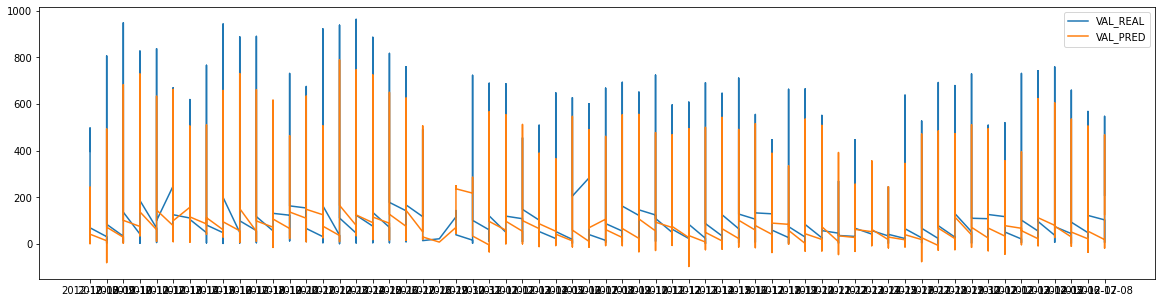

In [151]:
# 시각화
f1 = plt.figure(figsize=(20, 5))
plt.plot(val_data['dteday'], target_val_df['cnt'], label="VAL_REAL")
plt.plot(val_data['dteday'], val_pred, label="VAL_PRED")
plt.legend()
# plt.plot(val_data['dteday'], target_val_df['cnt'], val_data['dteday'], val_pred)

models.append(simple_regression)

## 06. Evaluation on Test set & make a pipeline

* Go? or Not to go?
* 모든 규칙을 정리하여 파이프라인을 제작하자.

In [155]:
# 최종 평가
# 긴연휴 및 전날의 대여량을 포함시켰을 경우와 안시켰을 경우의 차이는 존재 하는 듯 보임
# 그러나 1일 전후 데이터를 보느냐, 2일 전후 데이터도 보느냐의 차이는 크지 않음 (대여량은 1일전, 2일전, 휴일은 1일 전후, 2일 전후 휴일 여부)

# test 예측값 준비
features_name = origin_features
# features_name = added_features_type1
# features_name = added_features_type2
test_pred_origin = models[0].predict(features_test_df[features_name])

# TEST 에서의 성능 확인
print("ORIGIN MODEL RMean Squared Error on Training set : {0:.5f}".format(mean_squared_error(target_test_df, test_pred_origin)**(1/2)))
print("ORIGIN MODEL R-squared Score on Training set : {0:.5f}".format(r2_score(target_test_df, test_pred_origin)))

ORIGIN MODEL RMean Squared Error on Training set : 106.71687
ORIGIN MODEL R-squared Score on Training set : 0.51031


In [157]:
# test 예측값 준비
# features_name = origin_features
features_name = added_features_type1
# features_name = added_features_type2
test_pred_t1 = models[1].predict(features_test_df[features_name])

# TEST 에서의 성능 확인
print("ORIGIN MODEL RMean Squared Error on Training set : {0:.5f}".format(mean_squared_error(target_test_df, test_pred_t1)**(1/2)))
print("ORIGIN MODEL R-squared Score on Training set : {0:.5f}".format(r2_score(target_test_df, test_pred_t1)))

ORIGIN MODEL RMean Squared Error on Training set : 79.29005
ORIGIN MODEL R-squared Score on Training set : 0.72967


In [158]:
# test 예측값 준비
# features_name = origin_features
# features_name = added_features_type1
features_name = added_features_type2
test_pred_t2 = models[2].predict(features_test_df[features_name])

# TEST 에서의 성능 확인
print("ORIGIN MODEL RMean Squared Error on Training set : {0:.5f}".format(mean_squared_error(target_test_df, test_pred_t2)**(1/2)))
print("ORIGIN MODEL R-squared Score on Training set : {0:.5f}".format(r2_score(target_test_df, test_pred_t2)))

ORIGIN MODEL RMean Squared Error on Training set : 79.08921
ORIGIN MODEL R-squared Score on Training set : 0.73104


# ML Pipeline for system

Training Work Flow 의 모든 것을 재활용 한다.
* 처음에 pipeline부터 먼저 그린다. 같이 그리자!

**To-Do**
1. Training Phase : **전체 데이터를 이용하여 모델을 만든다.**(train/valid/test안나눈다.)
    * 하지만 이 실습에서는, 주어진 데이터만을 이용해야 하기 때문에 마지막 21일을 new_data로 떼어둔다.
    * 나머지 데이터를 old_data로 떼어둔다.
    * new_data는 마치 진짜로 데이터가 새로 들어올 때 처럼 사용할 것이다.

3. Prediction Phase :
    * new_data를 이용하여 예측값을 만들어본다.
4. Monitoring ?

## 01. Training Phase for model serving

* Training Work Flow의 여러 규칙들을, 전체 데이터(old_data)를 이용하여 다시 제작하면 됨.


## 02. Prediction Phase

**아래 내용들을 이용하여 진행한다.**
* 위 Training Phase에서 제작한 규칙
* 위 Training Phase에서 제작한 모델

## 03. Monitoring을 한다면?
** Discussion **